In [1]:
import numpy as np
import matplotlib.pyplot as plt

from spectools import lpsd, dsp
lpsd.use_c_core = False

import multiprocessing as mp
ctx = mp.get_context('fork')
pool = ctx.Pool()

In [2]:
plt.rcParams.update({
    # Figure and axes properties
    'figure.figsize': (5, 3),            # Figure size in inches
    'figure.dpi': 150,                   # Dots per inch for the figure (controls resolution)
    'figure.facecolor': 'white',         # Background color of the figure
    'figure.edgecolor': 'white',         # Edge color of the figure
    'axes.facecolor': 'white',           # Background color of the axes
    'axes.edgecolor': 'black',           # Edge color of the axes
    'axes.linewidth': 1.0,               # Line width of the axes' frame
    'axes.grid': True,                   # Whether to show grid lines by default
    'grid.color': 'gray',                # Grid line color
    'grid.linestyle': '--',              # Grid line style
    'grid.linewidth': 0.7,               # Grid line width

    # Font and text properties
    'font.size': 8,                      # Default font size
    'font.family': 'sans-serif',         # Font family
    'font.sans-serif': ['Arial'],        # Specify sans-serif font
    'axes.labelsize': 8,                 # Font size for axes labels
    'axes.titlesize': 9,                 # Font size for the plot title
    'axes.labelcolor': 'black',          # Color of the axes labels
    'axes.titleweight': 'regular',       # Weight of the title font
    'legend.fontsize': 8,                # Font size of the legend
    'legend.frameon': True,              # Whether to draw a frame around the legend

    # Tick properties
    'xtick.labelsize': 8,                # Font size for x-axis tick labels
    'ytick.labelsize': 8,                # Font size for y-axis tick labels
    'xtick.color': 'black',              # Color of x-axis ticks
    'ytick.color': 'black',              # Color of y-axis ticks
    'xtick.direction': 'out',            # Direction of x-axis ticks ('in' or 'out')
    'ytick.direction': 'out',            # Direction of y-axis ticks

    # Lines properties
    'lines.linewidth': 1.5,              # Default line width
    'lines.color': 'black',              # Default line color
    'lines.linestyle': '-',              # Default line style ('-', '--', '-.', ':')
    'lines.marker': '',                  # Default marker for points
    'lines.markersize': 5,               # Marker size

    # Legend properties
    'legend.loc': 'best',                # Legend location ('best', 'upper right', etc.)
    'legend.framealpha': 1.0,            # Transparency of the legend frame
    'legend.edgecolor': 'black',         # Edge color of the legend box

    # Save figure properties
    'savefig.dpi': 300,                  # Resolution when saving figures
    'savefig.format': 'pdf',             # Default format for saving figures
    'savefig.bbox': 'tight',             # Bounding box when saving figures
    'savefig.facecolor': 'white',        # Background color for saved figures

    # Color properties
    'axes.prop_cycle': plt.cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']),
    # Define a color cycle for different plot lines
})

# Crayons Theme:
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', [
    '#DC143C', '#FFD700', '#00BFFF', '#32CD32', '#FF69B4',
    '#FF4500', '#1E90FF', '#8A2BE2', '#FFA07A', '#8B0000',
    '#FF8C00', '#00FA9A', '#7B68EE', '#20B2AA', 
    '#FF6347', '#4682B4'
])

In [3]:
size = int(1e5)
rho = 1e-3
pink_x = np.fft.irfft(np.fft.rfft(np.random.normal(size=size)) / np.sqrt(np.arange(size//2+1)+1))
pink_y = rho * pink_x + np.sqrt(1 - rho**2) * np.fft.irfft(np.fft.rfft(np.random.normal(size=size)) / np.sqrt(np.arange(size//2+1)+1))
brown_noise_1 = np.cumsum(np.random.normal(0, 1, size))
brown_noise_2 = np.cumsum(np.random.normal(0, 1, size))
signal_1 = pink_x + 1*np.sin(2*np.pi*2.12345e-3*np.arange(size) + 1e-3*brown_noise_1) + 1*np.sin(2*np.pi*1e-1*np.arange(size) + 1e-3*brown_noise_2)
signal_2 = pink_y + (1/3)*np.sin(2*np.pi*2.12345e-3*np.arange(size) + 2e-3*brown_noise_1) + (1/3)*np.sin(2*np.pi*1e-1*np.arange(size) + 1e-3*brown_noise_2)

Text(0, 0.5, 'Signal')

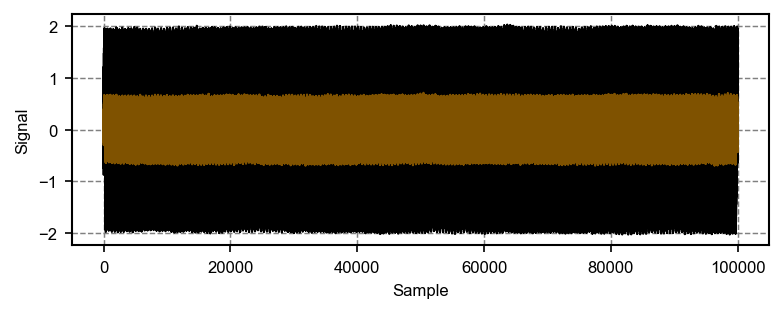

In [4]:
fig, ax = plt.subplots(figsize=(6,2), dpi=150)

ax.plot(signal_1, lw=1, c='k')
ax.plot(signal_2, lw=1, c='orange', alpha=0.5)
# ax.set_xlim(0,500)
ax.set_xlabel('Sample')
ax.set_ylabel('Signal')

Let's compute the ASD of `pink_x` and `pink_y` while passing the multiprocessing.Pool argument, which allows parallelizing the execution of the LPSD algorithm across the scheduled frequencies.

In [5]:
f, asd_x = lpsd.asd(signal_1, 1, pool=pool, bmin=8)
_, asd_y = lpsd.asd(signal_2, 1, pool=pool, bmin=8)

f, ps_x = lpsd.ps(signal_1, 1, pool=pool, bmin=8)
_, ps_y = lpsd.ps(signal_2, 1, pool=pool, bmin=8)

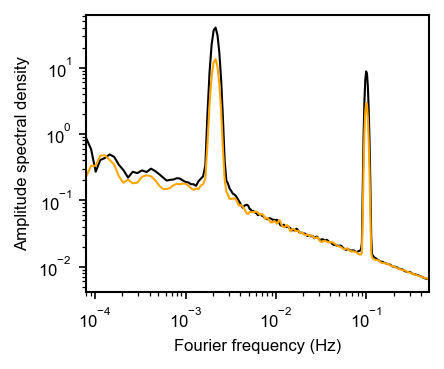

In [6]:
figsize=(3,2.5)
dpi=150
fontsize=8
linewidth=1

fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
ax.loglog(f, asd_x, linewidth=linewidth, color="black");
ax.loglog(f, asd_y, linewidth=linewidth, color="orange");
ax.set_xlim([f[0], f[-1]])
ax.set_xlabel("Fourier frequency (Hz)", fontsize=fontsize);
ax.set_ylabel(r"Amplitude spectral density", fontsize=fontsize);
ax.tick_params(axis='both', which='both', labelsize=fontsize)
ax.grid();
fig.tight_layout();

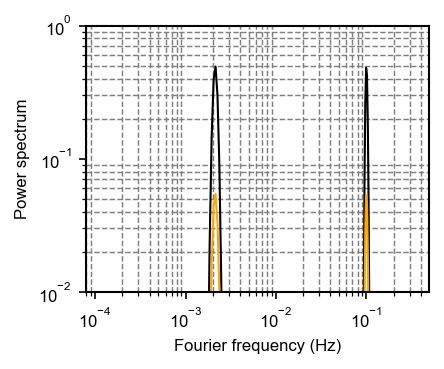

In [7]:
figsize=(3,2.5)
dpi=150
fontsize=8
linewidth=1

fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
ax.loglog(f, ps_x, linewidth=linewidth, color="black");
ax.loglog(f, ps_y, linewidth=linewidth, color="orange");
ax.set_xlim([f[0], f[-1]])
ax.set_ylim(1e-2,1)
ax.set_xlabel("Fourier frequency (Hz)", fontsize=fontsize);
ax.set_ylabel(r"Power spectrum", fontsize=fontsize);
ax.tick_params(axis='both', which='both', labelsize=fontsize)
ax.grid(which='both');
fig.tight_layout();

Now, let's compute the CSD and coherence of `pink_x` and `pink_y`

In [8]:
f, csd = lpsd.csd([signal_1,signal_2], 1, pool=pool)
_, cf = lpsd.coh([signal_1,signal_2], 1, pool=pool)
_, coh = lpsd.coh([signal_1,signal_2], 1, pool=pool)

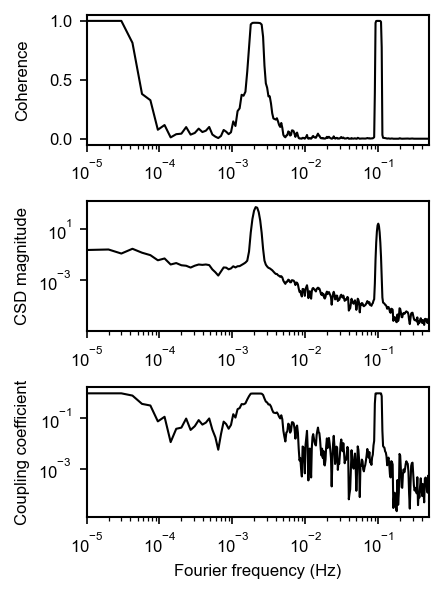

In [9]:
figsize=(3,4)
dpi=150
fontsize=8
linewidth=1

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=figsize, dpi=dpi, gridspec_kw={'height_ratios': [1, 1, 1]})
ax1.semilogx(f, coh, linewidth=linewidth, label="test", color="black");
ax2.loglog(f, np.abs(csd), linewidth=linewidth, label="test", color="black");
ax3.loglog(f, cf, linewidth=linewidth, label="test", color="black");
ax3.set_xlabel("Fourier frequency (Hz)", fontsize=fontsize);
ax1.set_ylabel("Coherence", fontsize=fontsize);
ax2.set_ylabel("CSD magnitude", fontsize=fontsize);
ax3.set_ylabel("Coupling coefficient", fontsize=fontsize);
ax1.set_xlim([f[0], f[-1]])
ax2.set_xlim([f[0], f[-1]])
ax3.set_xlim([f[0], f[-1]])
ax1.tick_params(which='both', labelsize=fontsize);
ax2.tick_params(which='both', labelsize=fontsize);
ax3.tick_params(which='both', labelsize=fontsize);
ax1.grid();
ax2.grid();
ax3.grid();
fig.tight_layout();
fig.align_ylabels();


The previous functions returned the Fourier frequency array and the desired measurement array (e.g., the ASD, CSD, coherence, etc). In the more general workflow, an LTFObject is returned, which contains attributes of all possible measurements. 

In [10]:
csd_obj = lpsd.ltf((signal_1, signal_2), 1, pool=pool)
csd_obj_inband = lpsd.ltf((signal_1, signal_2), 1, band=[1e-3,1e-1], pool=pool)

2024-10-30 13:32:45 INFO     Restricting frequencies to the desired band.


In [11]:
csd_obj_inband.f

array([0.00102794, 0.00110168, 0.00117801, 0.00125695, 0.00133849,
       0.00142264, 0.00150938, 0.00159874, 0.0016907 , 0.00178527,
       0.00188246, 0.00198225, 0.00208464, 0.00218965, 0.00229727,
       0.00240751, 0.00252037, 0.00263583, 0.0027539 , 0.0028746 ,
       0.00299791, 0.00312384, 0.00325239, 0.00338355, 0.00351733,
       0.00365374, 0.00379276, 0.00393441, 0.00407867, 0.00422555,
       0.00437505, 0.00452719, 0.00468194, 0.00483932, 0.00499932,
       0.00516195, 0.00532718, 0.00549505, 0.00566556, 0.00583869,
       0.00601443, 0.00619281, 0.00637381, 0.00655743, 0.00674368,
       0.00693254, 0.00712404, 0.00731818, 0.00751491, 0.00771427,
       0.00791629, 0.00812092, 0.00832817, 0.00853808, 0.00875062,
       0.00896576, 0.00918353, 0.00940394, 0.00962696, 0.00985264,
       0.01008095, 0.0103119 , 0.01054544, 0.01078162, 0.01102045,
       0.01126188, 0.01150825, 0.01176001, 0.01201728, 0.01228016,
       0.01254876, 0.01282326, 0.01310376, 0.01339038, 0.01368

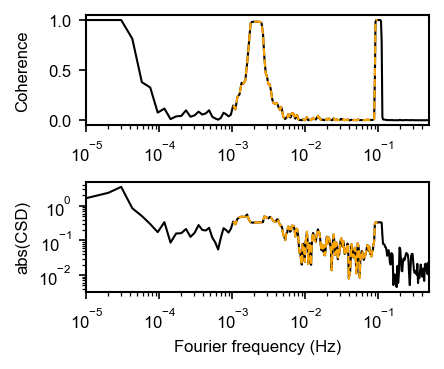

In [12]:
figsize=(3,2.5)
dpi=150
fontsize=8
linewidth=1

fig, (ax1, ax2) = plt.subplots(2,1, figsize=figsize, dpi=dpi, gridspec_kw={'height_ratios': [1, 1]})
ax1.semilogx(f, csd_obj.coh, linewidth=linewidth, label="test", color="k", ls='-');
ax1.semilogx(csd_obj_inband.f, csd_obj_inband.coh, linewidth=linewidth, label="test", color="orange", ls='--');
ax2.loglog(f, np.abs(csd_obj.Hxy), linewidth=linewidth, label="test", color="k", ls='-');
ax2.loglog(csd_obj_inband.f, np.abs(csd_obj_inband.Hxy), linewidth=linewidth, label="test", color="orange", ls='--');
ax2.set_xlabel("Fourier frequency (Hz)", fontsize=fontsize);
ax1.set_ylabel("Coherence", fontsize=fontsize);
ax2.set_ylabel("abs(CSD)", fontsize=fontsize);
ax1.set_xlim([f[0], f[-1]])
ax2.set_xlim([f[0], f[-1]])
ax1.tick_params(which='both', labelsize=fontsize);
ax2.tick_params(which='both', labelsize=fontsize);
ax1.grid();
ax2.grid();
fig.tight_layout();
fig.align_ylabels();


The `LTFObject` class has a plot method for a variety of measurements... plot options can be passed as optional arguments

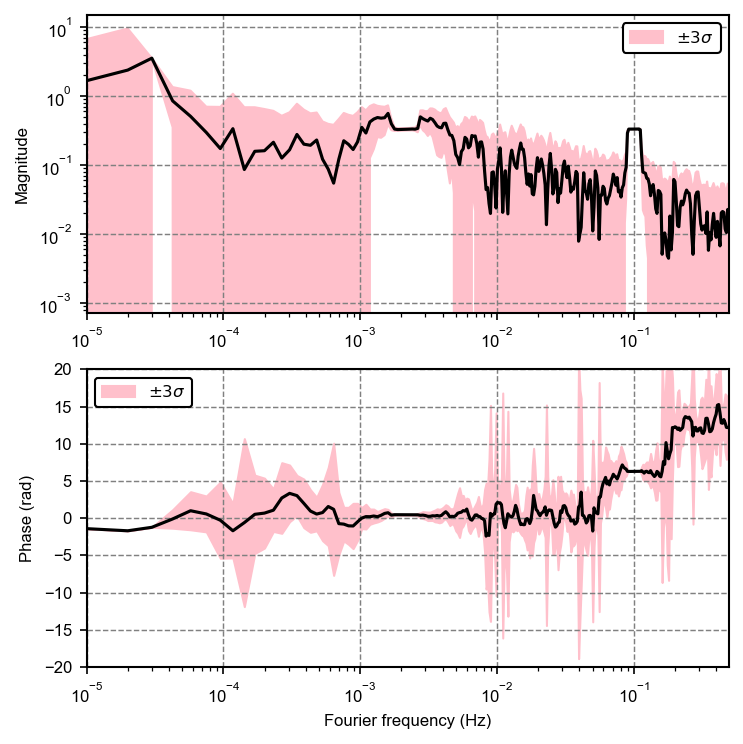

In [15]:
fig, (ax2, ax1) = csd_obj.plot(which='bode', errors=True, sigma=3, dB=False, unwrap=True, deg=False)
ax1.set_ylim(-20,20)
plt.show()

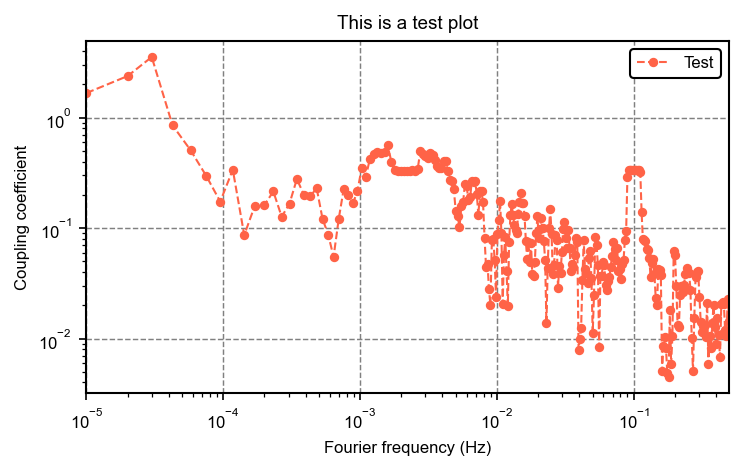

In [16]:
fig, ax = csd_obj.plot(which='cf', c='tomato', lw=1, ls='--', marker='o', markersize=3.5, label='Test')
ax.set_title('This is a test plot')
ax.legend()
plt.show()

In [ ]:
csd_obj.plot(which='coh', color='tomato', lw=1, ls='-', ylabel='Coherence function')

The `get_measurement` method allows estimating a measurement at a specified frequency by interpolation of the existing measurements. For example, let's compute the coupling coefficient precisely at 1 mHz:

In [ ]:
csd_obj.get_measurement(1e-3, which='cf')

Apart from the spectral estimates, the target measurement could be the bin number `m` or the frequency resolution `r`: 

In [ ]:
csd_obj.get_measurement(1e-3, which='m')

In [ ]:
csd_obj.get_measurement(1e-3, which='r')

In [ ]:
for f, r, m in zip(csd_obj.f, csd_obj.r, csd_obj.m):
    print(f"{f:6.6f}, {r:6.6f}, {m:6.3f}")

We can also perform single-bin computations

In [ ]:
csd_obj.get_measurement(1e-3, which='r')

In [21]:
csd_obj2 = lpsd.ltf_single_bin([pink_x, pink_y], 1, 1e-3, csd_obj.get_measurement(1e-3, which='r'))

In [ ]:
csd_obj2.cf, csd_obj.get_measurement(1e-3, which='cf')

In [23]:
coh = []
cf = []

for f, fres in zip(csd_obj.f, csd_obj.r):
    csd_sb = lpsd.ltf_single_bin([signal_1, signal_2], 1, f, fres)
    cf.append(csd_sb.cf)
    coh.append(csd_sb.coh)

In [ ]:
figsize=(3,2)
dpi=150
fontsize=8
linewidth=1.5

fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
ax.loglog(csd_obj.f, csd_obj.cf, linewidth=linewidth, label="test", color="black");
ax.loglog(csd_obj.f, cf, linewidth=linewidth, label="test", color="orange", ls='--');
ax.set_xlim([csd_obj.f[0],csd_obj.f[-1]])
ax.set_xlabel("Fourier frequency (Hz)", fontsize=fontsize);
ax.tick_params(axis='both', which='both', labelsize=fontsize)
ax.grid();
fig.tight_layout();

In [ ]:
figsize=(3,2)
dpi=150
fontsize=8
linewidth=1.

fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
ax.loglog(csd_obj.f, np.abs((csd_obj.cf-cf)/csd_obj.cf), linewidth=linewidth, label="test", color="red", ls='-');
ax.set_xlim([csd_obj.f[0],csd_obj.f[-1]])
ax.set_xlabel("Fourier frequency (Hz)", fontsize=fontsize);
ax.tick_params(axis='both', which='both', labelsize=fontsize)
ax.grid();
fig.tight_layout();

Let's now compute the auto-spectrum of `pink_x` in LTFObject format:

In [26]:
psd_obj = lpsd.ltf(pink_x, 1, pool=pool)

The RMS signal variations from the ASD measurement is calculated via the `get_rms` method:

In [ ]:
psd_obj.get_rms()

We can generate a timeseries from a calculated PSD via the `get_timeseries` method:

In [ ]:
timeseries = psd_obj.get_timeseries(0.5, 1e6)

In [ ]:
fig, ax = plt.subplots(figsize=(6,2), dpi=150)
ax.plot(timeseries, c='k', lw=1)
ax.set_xlabel('Sample')
ax.set_ylabel('Signal')

In [ ]:
psd_obj2 = lpsd.ltf(timeseries, 1, pool=pool)

In [ ]:
figsize=(3,2.5)
dpi=150
fontsize=8
linewidth=2

fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
ax.loglog(psd_obj.f, psd_obj.asd, linewidth=linewidth, color="black");
ax.loglog(psd_obj2.f, psd_obj2.asd, linewidth=1, color="orange", ls='-');
ax.set_xlim([psd_obj.f[0], psd_obj.f[-1]])
ax.set_xlabel("Fourier frequency (Hz)", fontsize=fontsize);
ax.set_ylabel(r"ASD $\rm (A/Hz^{1/2})$", fontsize=fontsize);
ax.tick_params(axis='both', which='both', labelsize=fontsize)
ax.grid();
fig.tight_layout();